# Demonstrate the Effect of the MuPDF Dehyphenation Flag
We will demonstrate here the impact of MuPDF's `TEXT_DEHYPHENATE` flag on extracted text and computed text boundary boxes.

First we import PyMuPDF and make a memory PDF with some hyphenated text.

In [1]:
# uncomment the following line(s) to ensure that all packages are available:
# !python -m pip install matplotlib
# !python -m pip install pymupdf

%matplotlib inline
import fitz  # import PyMuPDF

def show_image(item, title):
    """Display a pixmap.

    Just to display Pixmap image of "item" - ignore the man behind the curtain.

    Args:
        item: a PyMuPDF object having a "get_pixmap" method.
        title: a string to be used as image title

    Generates an RGB Pixmap from item using a constant DPI and uses matplotlib
    to show it inline of the notebook.
    """
    DPI = 150  # use this resolution
    %matplotlib inline
    import numpy as np
    import matplotlib.pyplot as plt
    pix = item.get_pixmap(dpi=DPI)
    img = np.ndarray([pix.h, pix.w, 3], dtype=np.uint8, buffer=pix.samples_mv)
    plt.figure(dpi=DPI)  # set the figure's DPI
    plt.title(title)  # set titel of image
    _ = plt.imshow(img, extent=(0, pix.w * 72 / DPI, pix.h * 72 / DPI, 0))

Here is the actual code.

In [2]:
text = (
    "This is a longer text with hyphena-\n"
    "ted words. It will be extracted using\n"
    "different flags.\n"
    "This will show, how bit settings influ-\n"
    "ence text bbox computations."
)

doc = fitz.open()  # new empty PDF
page = doc.new_page(width=500,height=300)  # new small-sized page
rect = page.rect + (72, 72, 0, 0)
_ = page.insert_textbox(rect, text, fontsize=24)

We take a look at the created page:

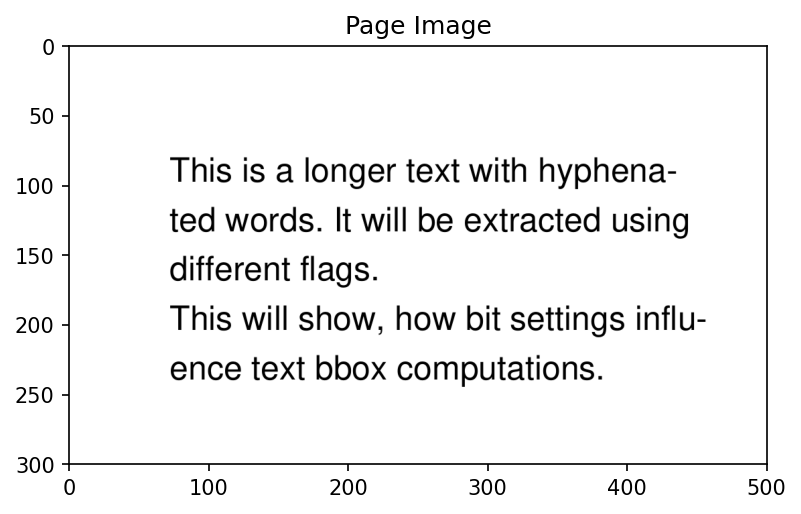

In [3]:
show_image(page, "Page Image")

First we do a simple extraction, using no special options. This extracts the text as shown in the file:

In [4]:
# using no special flags
print(page.get_text("text", flags=0))

This is a longer text with hyphena-
ted words. It will be extracted using
different flags.
This will show, how bit settings influ-
ence text bbox computations.



Now extract using the dehyphenation option.

Please note that a line will be joined with its successor if it ends with a hyphen.

In [5]:
# using the dehyphenation flag
print(page.get_text("text", flags=fitz.TEXT_DEHYPHENATE))

This is a longer text with hyphenated words. It will be extracted using
different flags.
This will show, how bit settings influence text bbox computations.

